In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

## Load Data

In [2]:
# define the base path
base_path = "data/r4.2/"

# load each CSV file into a separate dataframe
device_df = pd.read_csv(base_path + "device.csv")
email_df = pd.read_csv(base_path + "email.csv")
file_df = pd.read_csv(base_path + "file.csv")
http_df = pd.read_csv(base_path + "http.csv")
logon_df = pd.read_csv(base_path + "logon.csv")


## Data Exploration

### Device.csv

In [3]:
# view data
device_df.head()

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


In [4]:
# check for missing values
device_df.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [5]:
# data types for each column
device_df.dtypes

id          object
date        object
user        object
pc          object
activity    object
dtype: object

### Email.csv

In [6]:
# view data
email_df.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [7]:
# check for missing values
email_df.isnull().sum()

id                   0
date                 0
user                 0
pc                   0
to                   0
cc             1617054
bcc            2212977
from                 0
size                 0
attachments          0
content              0
dtype: int64

In [8]:
# null values in cc and bcc, but this is normal, so lets just say there is "None" if a NaN exists
email_df['cc'].fillna('None', inplace=True)
email_df['bcc'].fillna('None', inplace=True)

In [9]:
# data types for each column
email_df.dtypes

id             object
date           object
user           object
pc             object
to             object
cc             object
bcc            object
from           object
size            int64
attachments     int64
content        object
dtype: object

### File.csv

In [10]:
# view data
file_df.head()

,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [11]:
# check for missing values
file_df.isnull().sum()

id          0
date        0
user        0
pc          0
filename    0
content     0
dtype: int64

In [12]:
# data types for each column
file_df.dtypes

id          object
date        object
user        object
pc          object
filename    object
content     object
dtype: object

### Http.csv

In [13]:
# view data
http_df.head()

,id,date,user,pc,url,content
0,{V1Y4-S2IR20QU-6154HFXJ},01/02/2010 06:55:16,LRR0148,PC-4275,http://msn.com/The_Human_Centipede_First_Seque...,remain representatives consensus concert altho...
1,{Q5R1-T3EF87UE-2395RWZS},01/02/2010 07:00:13,NGF0157,PC-6056,http://urbanspoon.com/Plunketts_Creek_Loyalsoc...,festival off northwards than congestion partne...
2,{X9O1-O0XW52VO-5806RPHG},01/02/2010 07:03:46,NGF0157,PC-6056,http://aa.com/Rhodocene/rhodocenium/fhaavatqrf...,long away reorganized baldwin seth business 18...
3,{G5S8-U5OG04TE-5299CCTU},01/02/2010 07:05:26,IRM0931,PC-7188,http://groupon.com/Leonhard_Euler/leonhard/tne...,among german schwein experimental becomes prev...
4,{L0R4-A9DH29VP-4553AUWM},01/02/2010 07:05:52,IRM0931,PC-7188,http://flickr.com/Inauguration_of_Barack_Obama...,kate criteria j 2008 highest 12 include books ...


In [14]:
# check for missing values
http_df.isnull().sum()

id         0
date       0
user       0
pc         0
url        0
content    0
dtype: int64


In [15]:
# data types for each column
http_df.dtypes

id         object
date       object
user       object
pc         object
url        object
content    object
dtype: object

### Logon.csv

In [16]:
# view data
logon_df.head()

,id,date,user,pc,activity
0,{X1D9-S0ES98JV-5357PWMI},01/02/2010 06:49:00,NGF0157,PC-6056,Logon
1,{G2B3-L6EJ61GT-2222RKSO},01/02/2010 06:50:00,LRR0148,PC-4275,Logon
2,{U6Q3-U0WE70UA-3770UREL},01/02/2010 06:53:04,LRR0148,PC-4124,Logon
3,{I0N5-R7NA26TG-6263KNGM},01/02/2010 07:00:00,IRM0931,PC-7188,Logon
4,{D1S0-N6FH62BT-5398KANK},01/02/2010 07:00:00,MOH0273,PC-6699,Logon


In [17]:
# check for missing values
logon_df.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [18]:
# data types for each column
logon_df.dtypes

id          object
date        object
user        object
pc          object
activity    object
dtype: object

## Feature Engineering

In [19]:
# converting date to datetime and extracting detailed time features
time_features = ['device_df', 'email_df', 'file_df', 'logon_df', 'http_df']
for df_name in time_features:
    df = globals()[df_name]
    df['datetime'] = pd.to_datetime(df['date'])
    df['date'] = df['datetime'].dt.date
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday

In [20]:
# define a feature mapping dictionary for different activities
feature_map = {
    'Connect_Normal': 0,
    'Connect_NonNormal': 1,
    'Disconnect': 2,
    'Email_In': 3,
    'Email_Out': 4,
    'File_exe': 5,  
    'File_jpg': 6,  
    'File_zip': 7,  
    'File_txt': 8,  
    'File_doc': 9,
    'File_pdf': 10,
    'Weekday_Logon_Normal': 11,
    'Weekday_Logon_After': 12,
    'Logoff': 13,
    'URL_Visit': 14
}

#### Device Dataframe Feature Engineering

In [22]:
# create binary indicators for each device activity
device_df['Connect_Normal'] = ((device_df['activity'] == 'Connect') & (device_df['weekday'] < 5) & (device_df['hour'] >= 8) & (device_df['hour'] < 17)).astype(int)
device_df['Connect_NonNormal'] = ((device_df['activity'] == 'Connect') & ((device_df['weekday'] >= 5) | (device_df['hour'] < 8) | (device_df['hour'] >= 17))).astype(int)
device_df['Disconnect'] = (device_df['activity'] != 'Connect').astype(int)

# create a feature index based on the device activity
device_df['feature_index'] = device_df.apply(lambda row: feature_map['Connect_Normal'] if row['Connect_Normal'] else 
                                             (feature_map['Connect_NonNormal'] if row['Connect_NonNormal'] else 
                                              feature_map['Disconnect']), axis=1)

# aggregate features per user per day for device_df
device_features = device_df.groupby(['user', 'date']).agg({
    'Connect_Normal': 'sum',
    'Connect_NonNormal': 'sum',
    'Disconnect': 'sum',
    'feature_index': 'first'
}).reset_index()

#### Email Dataframe Feature Engineering

In [23]:
# function to check for external emails
def is_external_email(addresses):
    return addresses.apply(lambda x: 0 if pd.isna(x) else int(any('@dtaa.com' not in address for address in str(x).split(';'))))

# apply the function to 'to', 'cc', and 'bcc' columns for email_df
email_df['Email_Out'] = is_external_email(email_df['to']) | is_external_email(email_df['cc']) | is_external_email(email_df['bcc'])
email_df['Email_In'] = ~email_df['Email_Out']

# boolean to int
email_df['Email_Out'] = email_df['Email_Out'].astype(int)
email_df['Email_In'] = email_df['Email_In'].astype(int)

# create a feature index based on whether it's an inbound or outbound email
email_df['feature_index'] = email_df.apply(lambda row: feature_map['Email_In'] if row['Email_In'] else feature_map['Email_Out'], axis=1)

# aggregate features per user per day for email_df
email_features = email_df.groupby(['user', 'date']).agg({
    'Email_In': 'sum',
    'Email_Out': 'sum',
    'feature_index': 'first'
}).reset_index()

#### File Dataframe Feature Engineering

In [24]:
# create binary indicators for file types in file_df
file_types = ['.exe', '.jpg', '.zip', '.txt', '.doc', '.pdf']
for file_type in file_types:
    file_df['File' + file_type.replace('.', '_')] = file_df['filename'].str.lower().str.endswith(file_type).astype(int)

# create a feature index based on the file type
def map_file_feature(row):
    for file_type in ['File_exe', 'File_jpg', 'File_zip', 'File_txt', 'File_doc', 'File_pdf']:
        if row[file_type]:
            return feature_map[file_type]
    return feature_map['File_other']

file_df['feature_index'] = file_df.apply(map_file_feature, axis=1)

# aggregate features per user per day for file_df
file_features = file_df.groupby(['user', 'date']).agg({
    'File_exe': 'sum',
    'File_jpg': 'sum',
    'File_zip': 'sum',
    'File_txt': 'sum',
    'File_doc': 'sum',
    'File_pdf': 'sum',
    'feature_index': 'first'
}).reset_index()

#### Logon Dataframe Feature Engineering

In [25]:
# create binary indicators for logon/logoff activities in logon_df
logon_df['Weekday_Logon_Normal'] = ((logon_df['activity'] == 'Logon') & (logon_df['weekday'] < 5) & (logon_df['hour'] >= 8) & (logon_df['hour'] < 17)).astype(int)
logon_df['Weekday_Logon_After'] = ((logon_df['activity'] == 'Logon') & ((logon_df['weekday'] >= 5) | (logon_df['hour'] < 8) | (logon_df['hour'] >= 17))).astype(int)
logon_df['Logoff'] = (logon_df['activity'] != 'Logon').astype(int)

# create a feature index based on logon/logoff activities
logon_df['feature_index'] = logon_df.apply(lambda row: feature_map['Weekday_Logon_Normal'] if row['Weekday_Logon_Normal'] else 
                                           (feature_map['Weekday_Logon_After'] if row['Weekday_Logon_After'] else 
                                            feature_map['Logoff']), axis=1)


# aggregate features per user per day for logon_df
logon_features = logon_df.groupby(['user', 'date']).agg({
    'Weekday_Logon_Normal': 'sum',
    'Weekday_Logon_After': 'sum',
    'Logoff': 'sum',
    'feature_index': 'first'
}).reset_index()

#### HTTP Dataframe Feature Engineering

In [26]:
# create a binary indicator for URL visits in http_df
http_df['URL_Visit'] = 1

# set a feature index for http_df
http_df['feature_index'] = feature_map['URL_Visit']

# aggregate features per user per day for http_df
http_features = http_df.groupby(['user', 'date']).agg({
    'URL_Visit': 'sum',
    'feature_index': 'first'
}).reset_index()

## Data Vectorization

In [27]:
# combine aggregated features
all_features = [device_features, email_features, file_features, logon_features, http_features]
combined_df = pd.concat(all_features)

In [28]:
# sort by date and user
sorted_df = combined_df.sort_values(by=['user', 'date'])

In [29]:
# define the time horizon
start_date = sorted_df['date'].min()
end_date = sorted_df['date'].max()
time_horizon = (end_date - start_date).days + 1

def vectorize_data(user_data):
    vector = np.zeros((len(feature_map), time_horizon))
    for _, row in user_data.iterrows():
        date_index = (row['date'] - start_date).days
        feature_index = row['feature_index']
        vector[feature_index, date_index] += 1
    return vector

# apply vectorization for each user
user_vectors = sorted_df.groupby('user').apply(vectorize_data)


## Working With the Model

In [30]:
# 'threat_actors' is a list of users who are considered threats (predefined)
threat_actors=["AAM0658","AJR0932","BDV0168","BIH0745","BLS0678","BTL0226","CAH0936","DCH0843","EHB0824","EHD0584","FMG0527","FTM0406","GHL0460","HJB0742","JMB0308","JRG0207","KLH0596","KPC0073","LJR0523","LQC0479","MAR0955","MAS0025","MCF0600","MYD0978","PPF0435","RAB0589","RGG0064","RKD0604","TAP0551","WDD0366","AAF0535","ABC0174","AKR0057","CCL0068","CEJ0109","CQW0652","DIB0285","DRR0162","EDB0714","EGD0132","FSC0601","HBO0413","HXL0968","IJM0776","IKR0401","IUB0565","JJM0203","KRL0501","LCC0819","MDH0580","MOS0047","NWT0098","PNL0301","PSF0133","RAR0725","RHL0992","RMW0542","TNM0961","VSS0154","XHW0498","BBS0039","BSS0369","CCA0046","CSC0217","GTD0219","JGT0221","JLM0364","JTM0223","MPM0220","MSO0222",]

X = np.array([vector for vector in user_vectors])

# define labels (y) based on whether a user is in 'threat_actors'
y = np.array([user in threat_actors for user in user_vectors.index])

#### Train-Test Split

In [31]:
# split the data into training and testing sets (train 75% test 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 15, 501)
(750,)
(250, 15, 501)
(250,)


#### Data Reshaping

In [32]:
X_train_reshaped = X_train.reshape([X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1] * X_test.shape[2]])

# separate normal and threat data in the training set
X_train_normal = X_train_reshaped[y_train == 0, :]
X_train_threat = X_train_reshaped[y_train == 1, :]
print(X_train_normal.shape)
print(X_train_threat.shape)

# separate normal and threat data in the testing set
X_test_normal = X_test_reshaped[y_test == 0, :]
X_test_threat = X_test_reshaped[y_test == 1, :]
print(X_test_normal.shape)
print(X_test_threat.shape)

(697, 7515)
(53, 7515)
(233, 7515)
(17, 7515)


## Anomaly Detection

In [33]:
# initialize the Isolation Forest model
IF = IsolationForest(
    n_estimators=100, max_samples=256, contamination=0.035
)

Text(0.5, 1.0, 'Distribution of anomaly score for non threats')

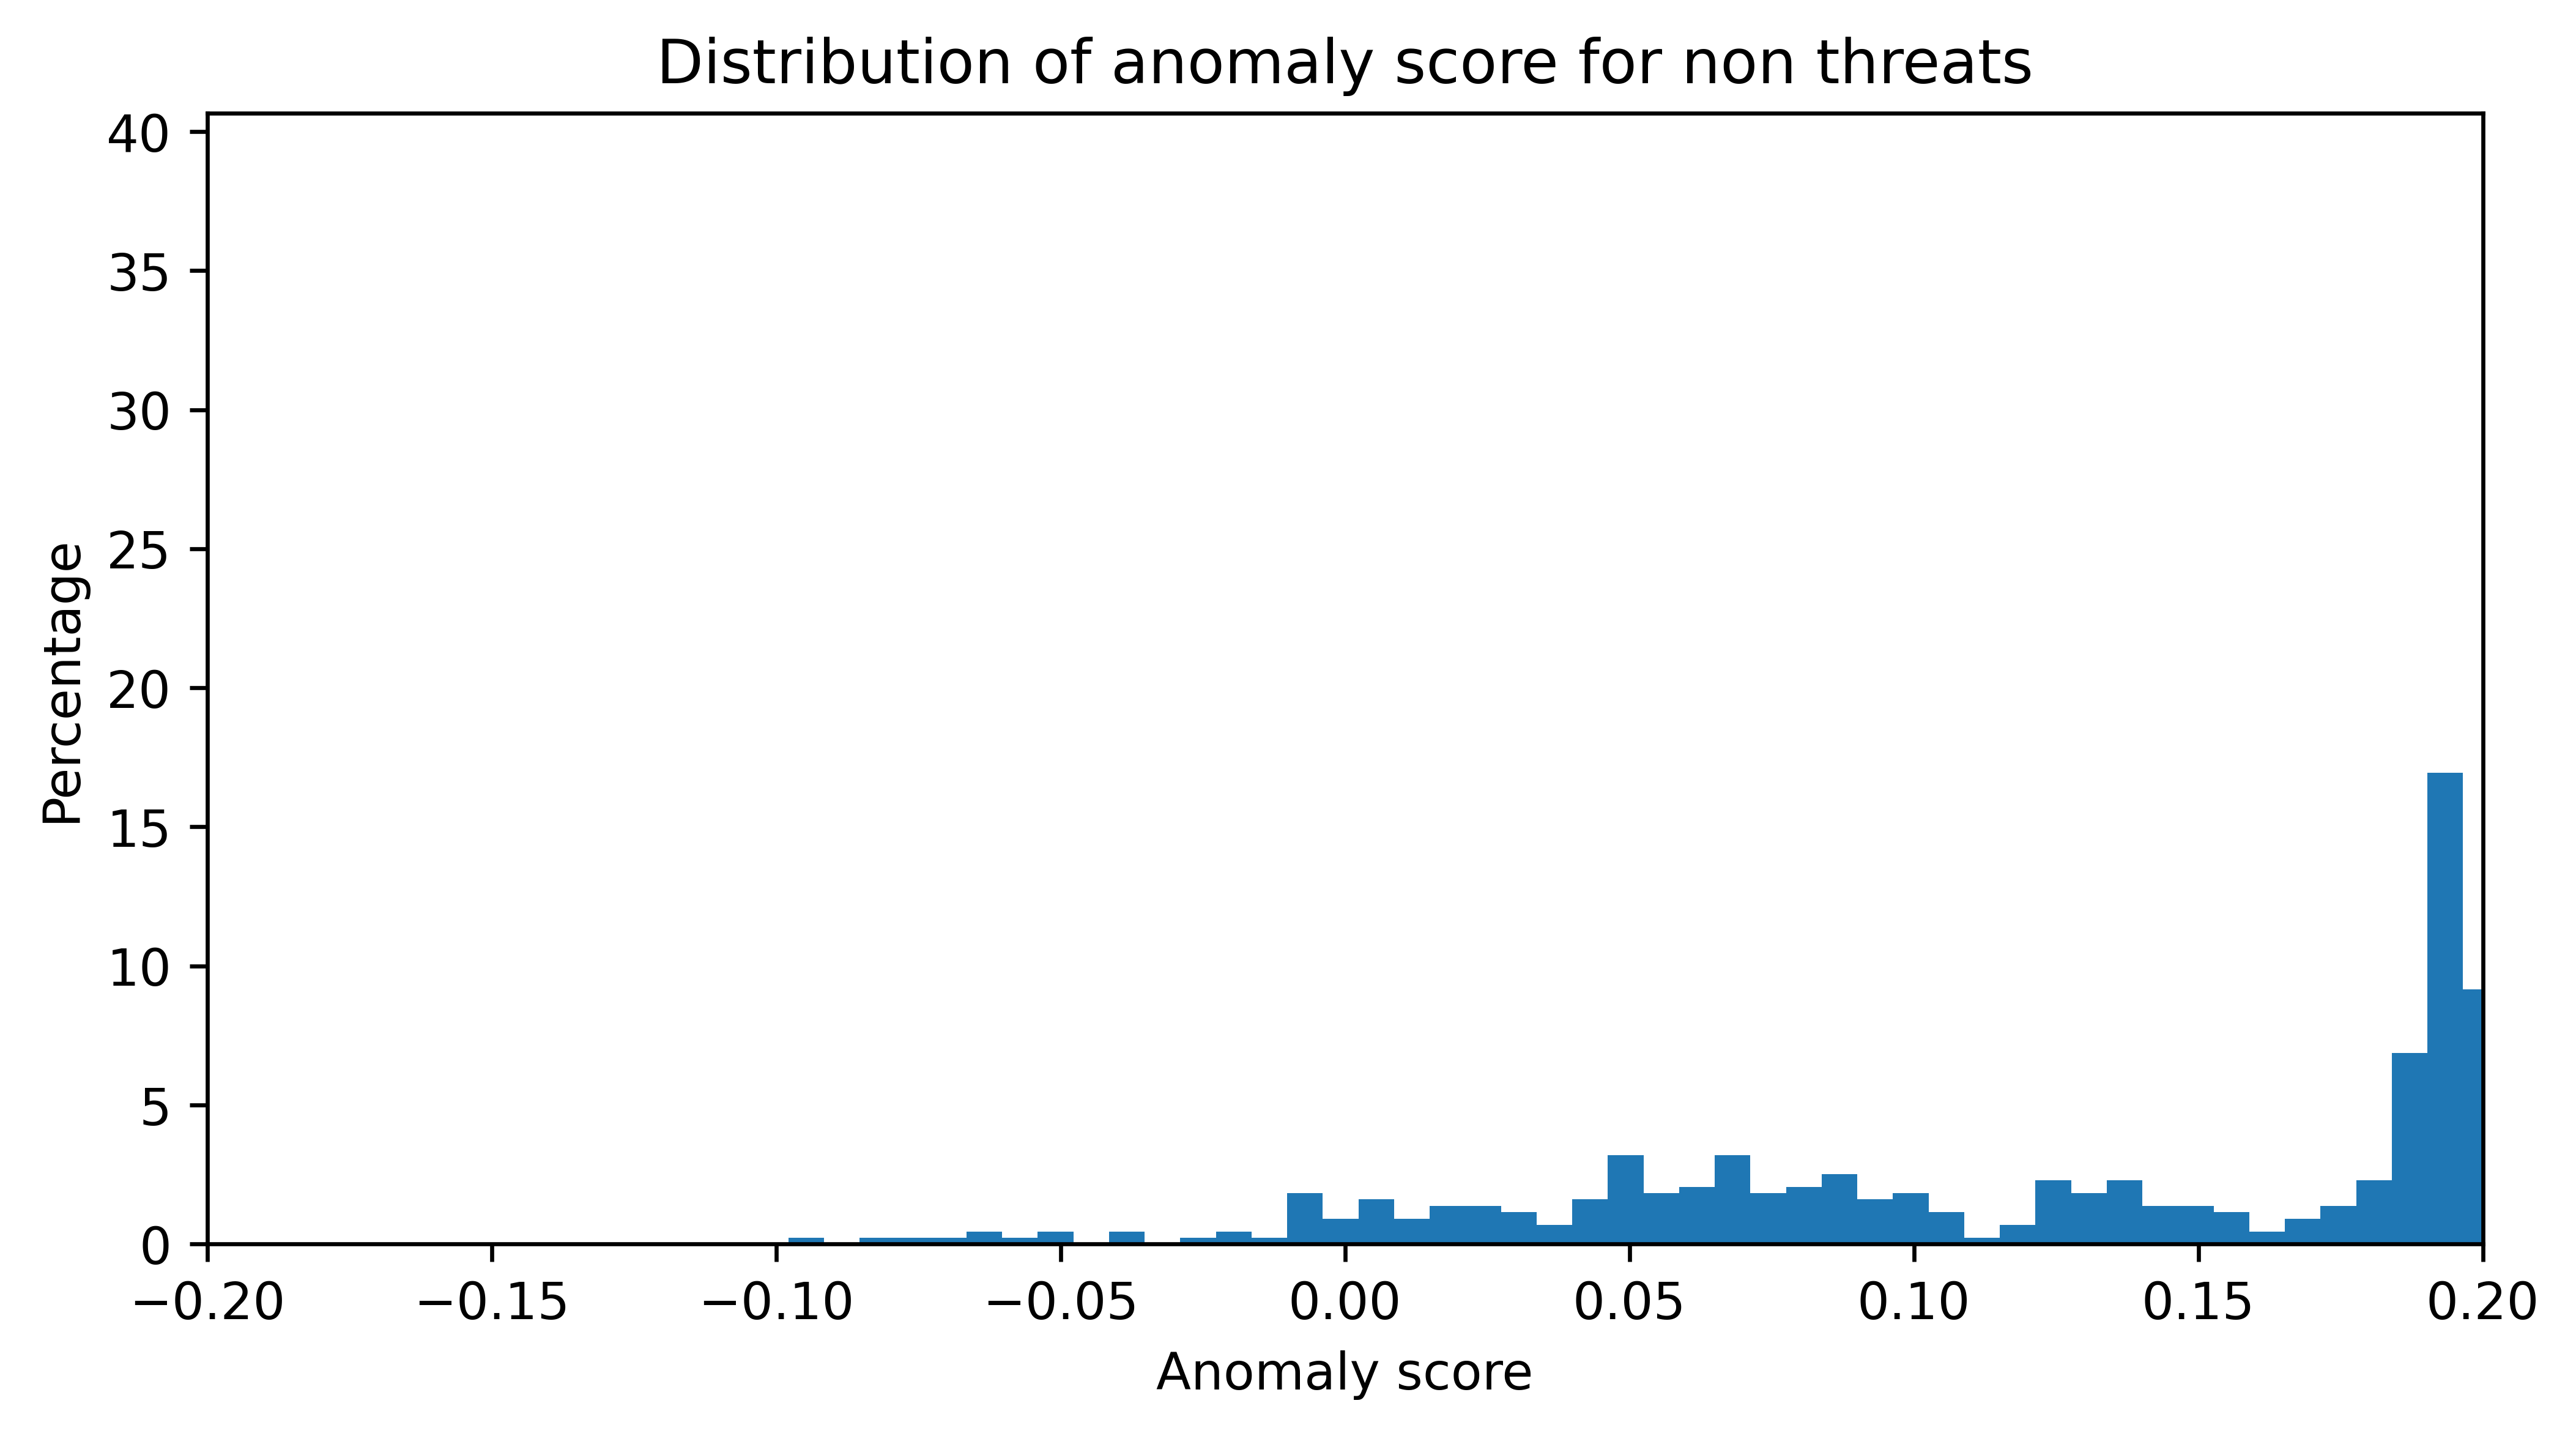

In [34]:
# fit the model on the reshaped training data
IF.fit(X_train_reshaped)

# calculate anomaly scores for normal data in the training set
normal_scores = IF.decision_function(X_train_normal)

# plot the distribution of anomaly scores for normal data
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor="w", edgecolor="k")
normal = plt.hist(normal_scores, 50, density=True)

plt.xlim((-0.2, 0.2))
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of Anomaly Score For Non-Threats")

Text(0.5, 1.0, 'Distribution of anomaly score for threats')

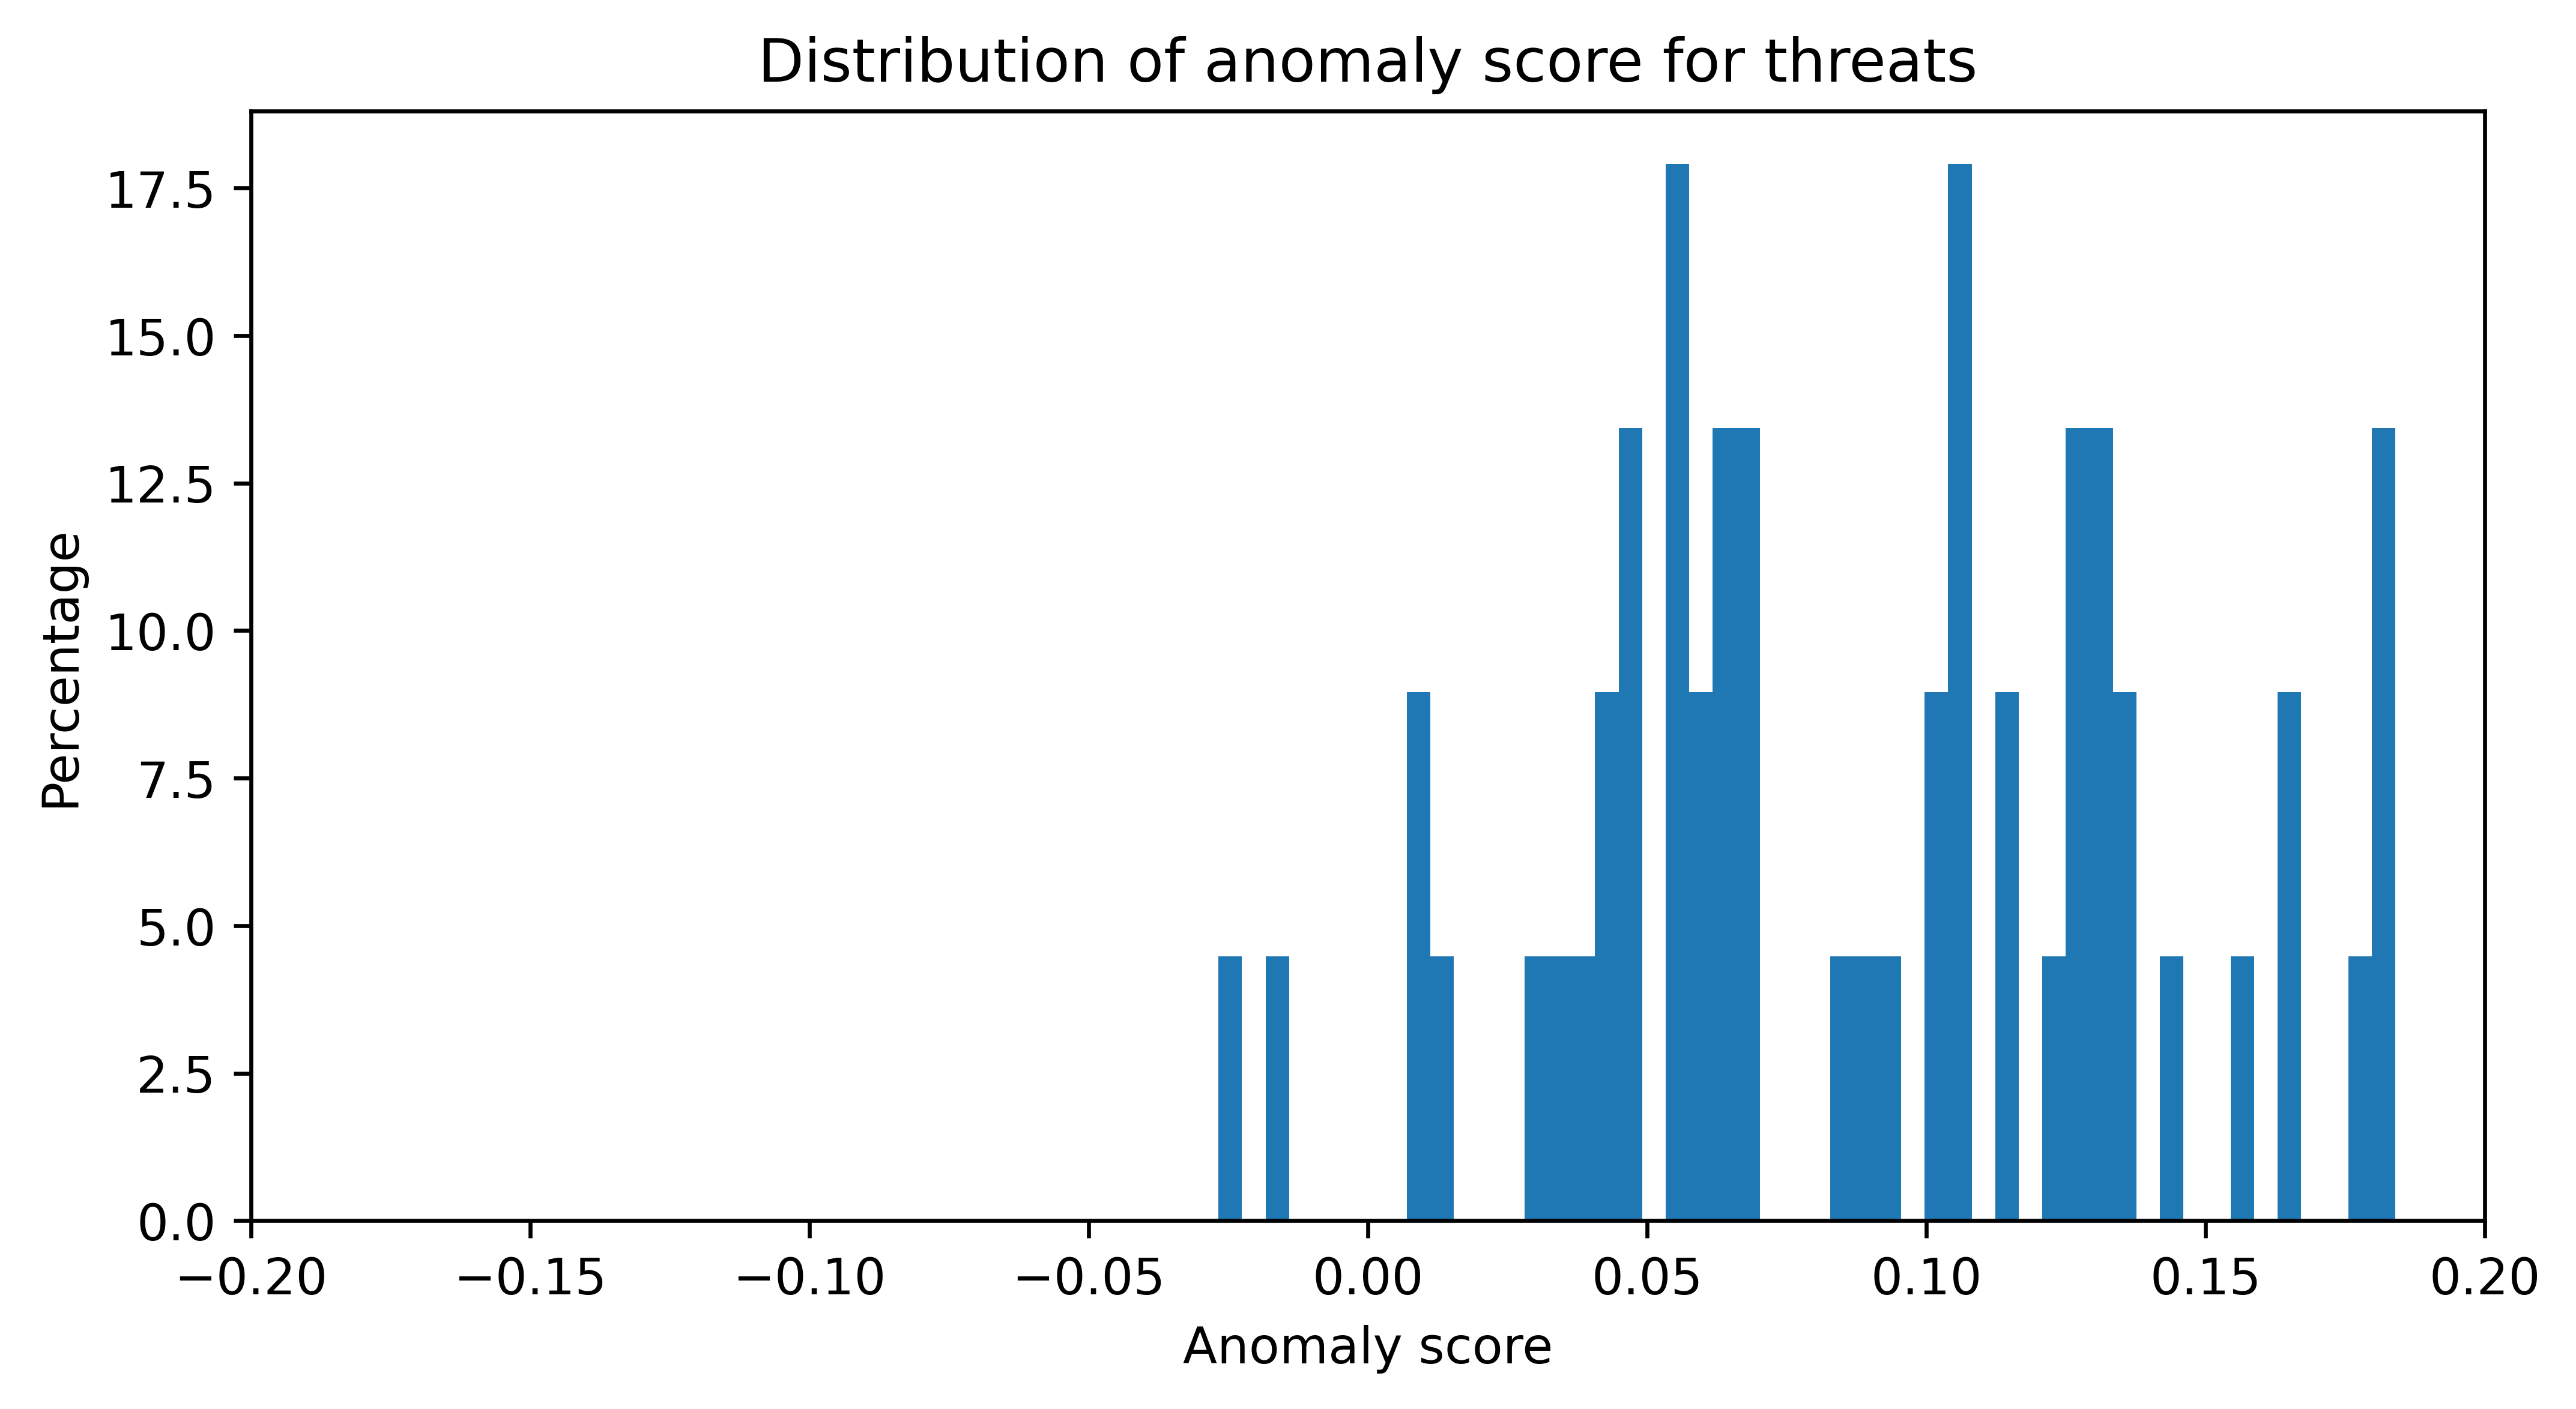

In [35]:
# calculate anomaly scores for threat data in the training set
anomaly_scores = IF.decision_function(X_train_threat)

# plot the distribution of anomaly scores for threat data
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor="w", edgecolor="k")
anomaly = plt.hist(anomaly_scores, 50, density=True)

plt.xlim((-0.2, 0.2))
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of Anomaly Score For Threats")

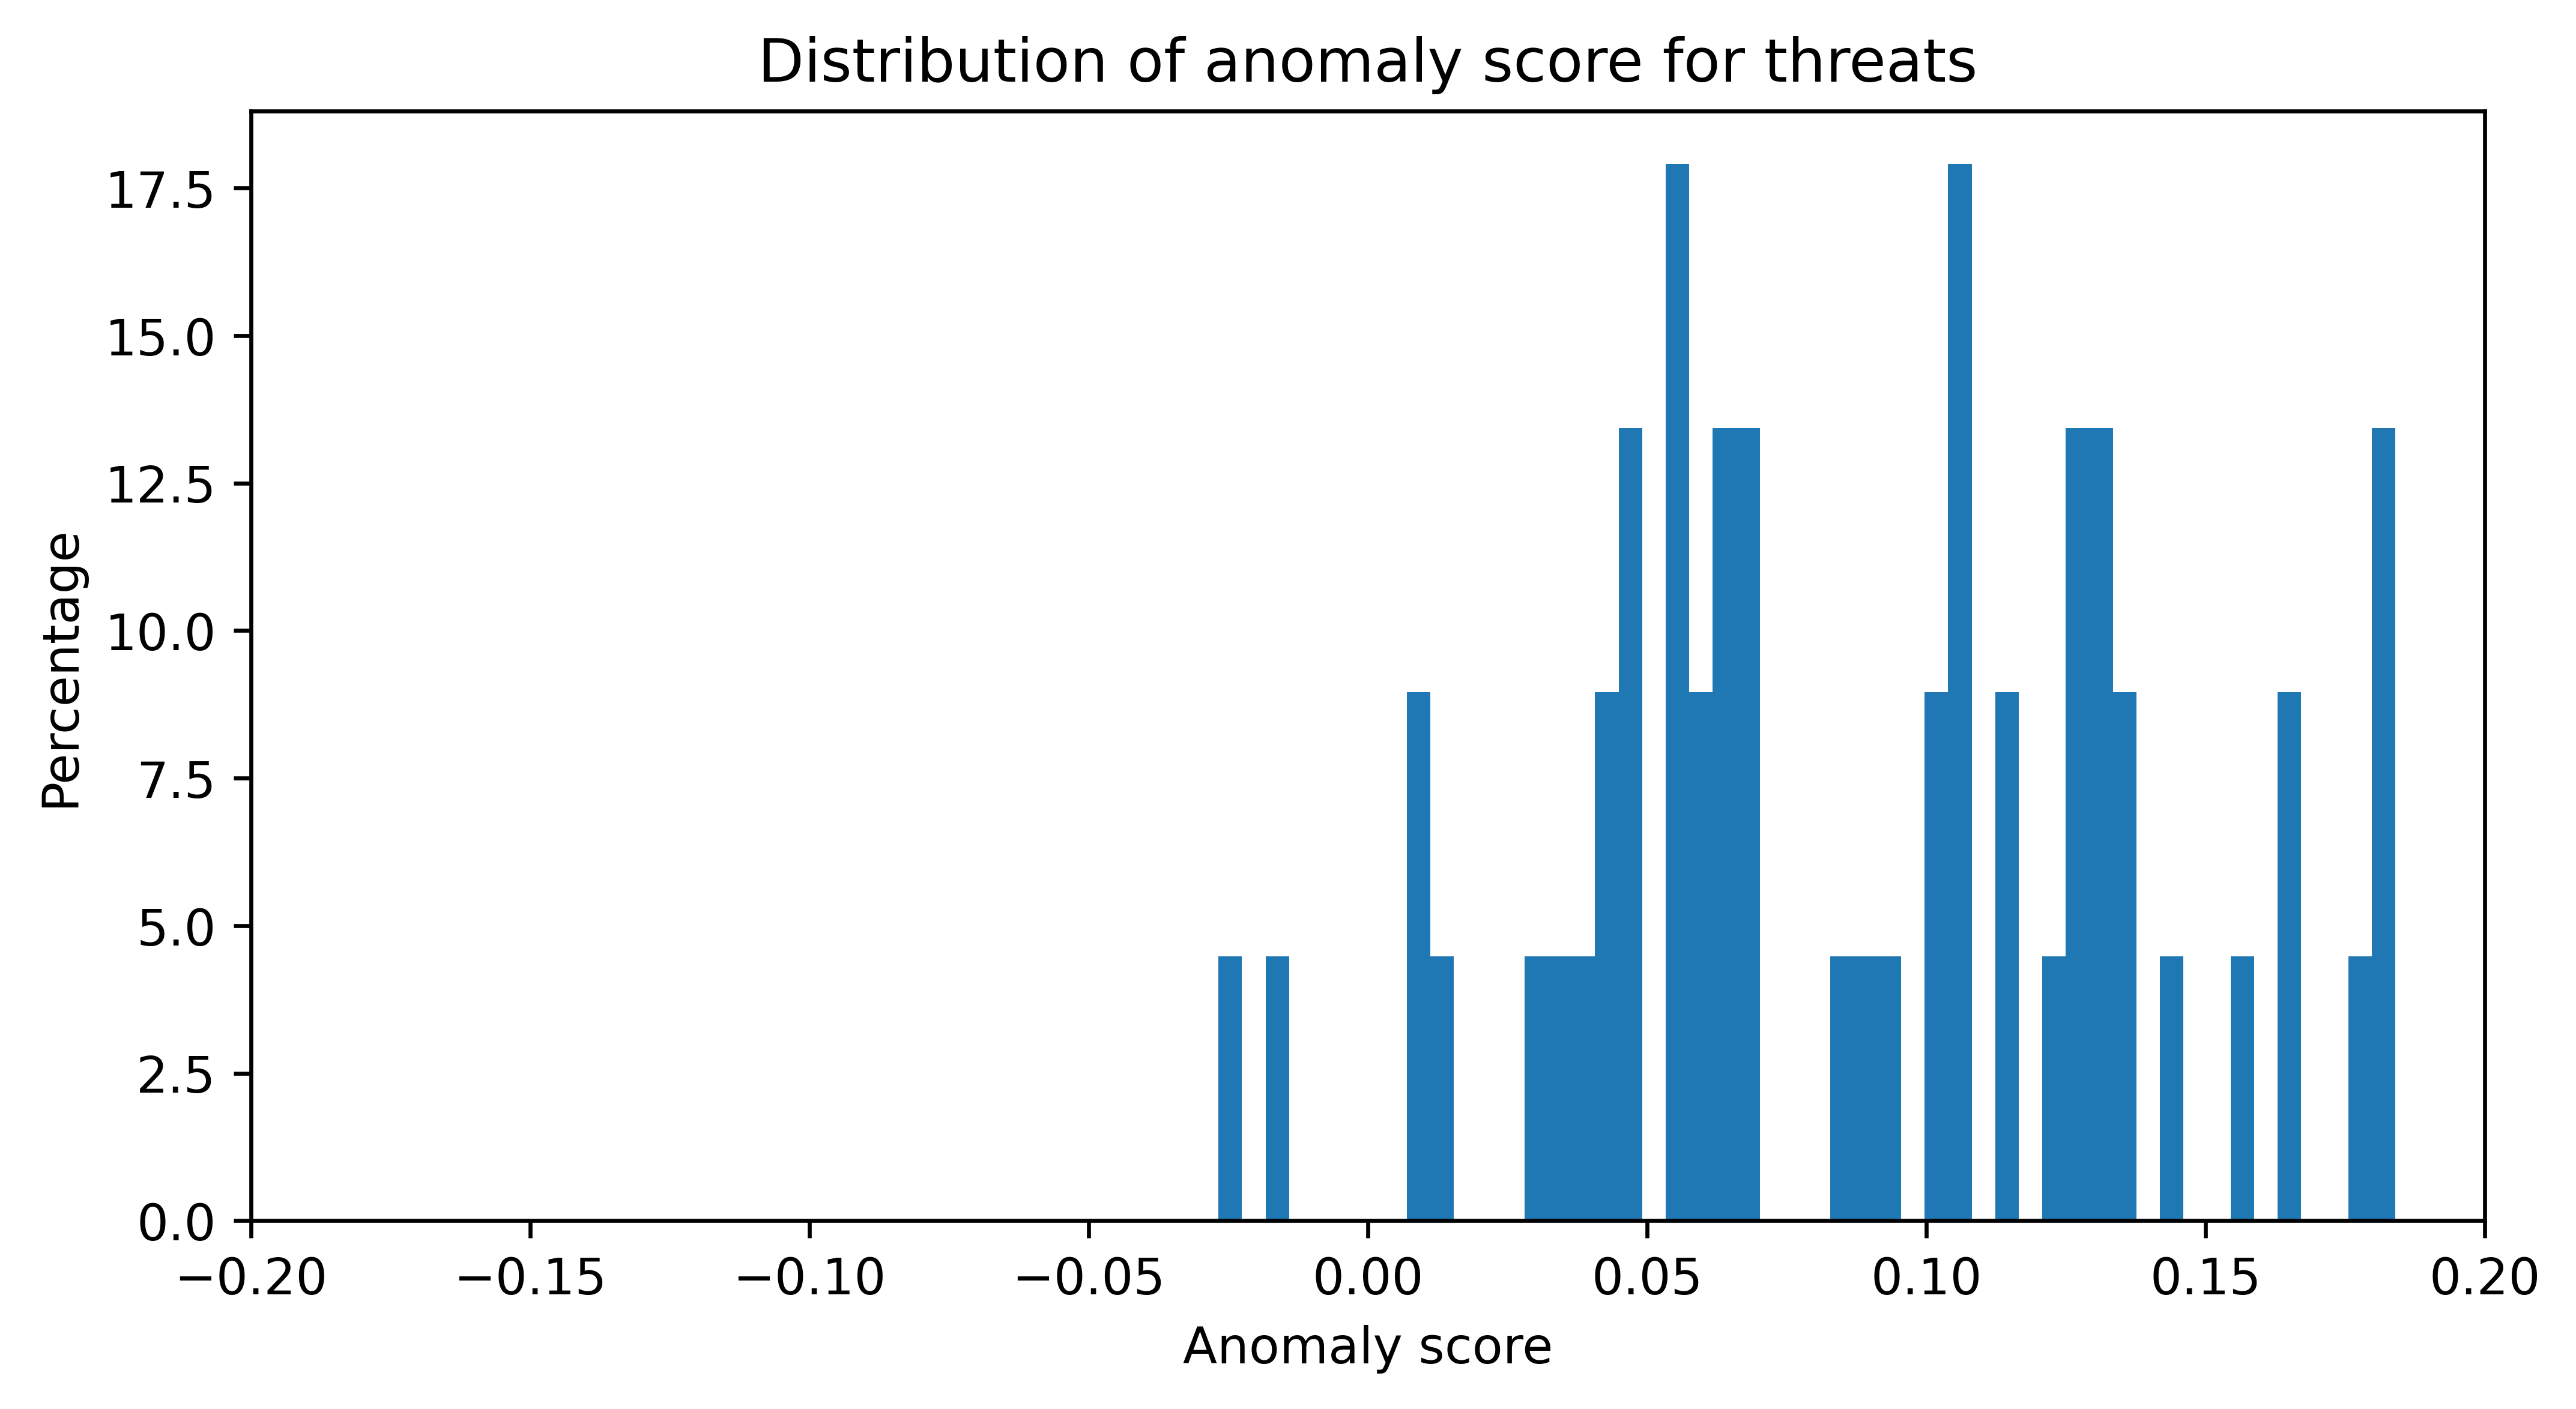

In [43]:
# compute histogram
bin_count = 50
hist, bin_edges = np.histogram(anomaly_scores, bins=bin_count, density=True)

# maximum bin
max_bin_index = np.argmax(hist)
max_bin_value = hist[max_bin_index]
max_bin_center = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

plt.figure(figsize=(8, 4), dpi=600)
plt.hist(anomaly_scores, bins=bin_count, density=True)
plt.xlim((-0.2, 0.2))
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of anomaly score for threats")

plt.show()

In [46]:
# set a threshold for anomaly detection
cutoff = 0.19

# calculate anomaly scores for the training set
s = IF.decision_function(X_train_reshaped)
print("Training Results")
print(Counter(y_train[cutoff > s]))

# calculate anomaly scores for the testing set
s = IF.decision_function(X_test_reshaped)
print("Testing Results")
print(Counter(y_test[cutoff > s]))

Training Results
Counter({False: 257, True: 53})
Testing Results
Counter({False: 82, True: 17})


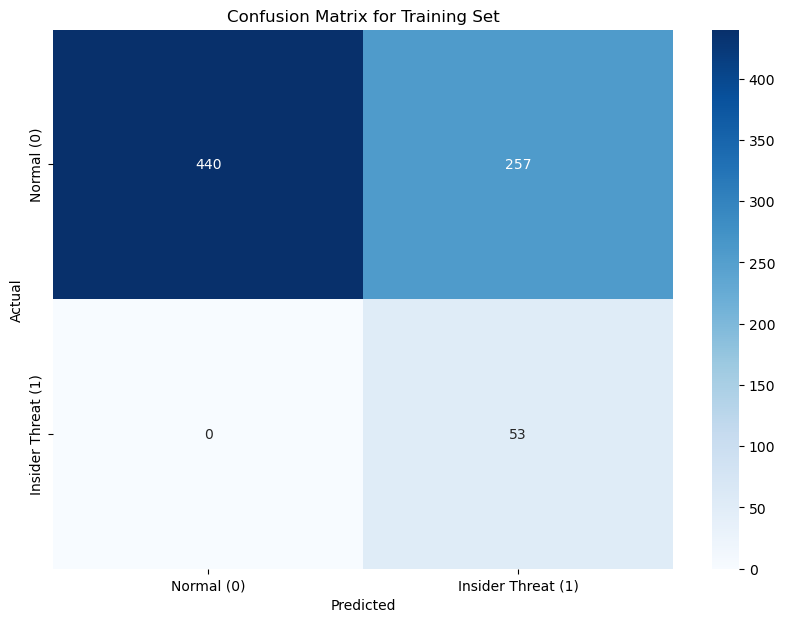

Classification Report for Training Set:
              precision    recall  f1-score   support

       False       1.00      0.63      0.77       697
        True       0.17      1.00      0.29        53

    accuracy                           0.66       750
   macro avg       0.59      0.82      0.53       750
weighted avg       0.94      0.66      0.74       750



In [48]:
# predictions for training set
# if the anomaly score is greater than the cutoff, it's a normal case (0), otherwise, it's a threat (1)
training_predictions = (IF.decision_function(X_train_reshaped) < cutoff).astype(int)

# confusion matrix
training_cm = confusion_matrix(y_train, training_predictions)

# metrics
training_report = classification_report(y_train, training_predictions)

# labels
class_labels = ["Normal (0)", "Insider Threat (1)"]

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(training_cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set')
plt.show()

# print metrics
print("Classification Report for Training Set:")
print(training_report)

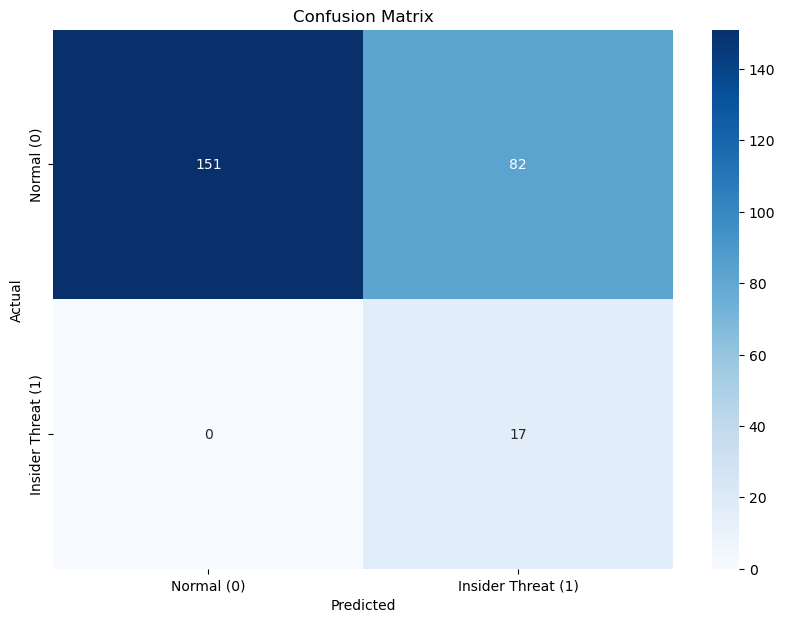

Classification Report for Test Set:
              precision    recall  f1-score   support

       False       1.00      0.65      0.79       233
        True       0.17      1.00      0.29        17

    accuracy                           0.67       250
   macro avg       0.59      0.82      0.54       250
weighted avg       0.94      0.67      0.75       250



In [49]:
# predictions for training set
# if the anomaly score is greater than the cutoff, it's a normal case (0), otherwise, it's a threat (1)
test_predictions = (IF.decision_function(X_test_reshaped) < cutoff).astype(int)

# confusion matrix
test_cm = confusion_matrix(y_test, test_predictions)

# metrics
test_report = classification_report(y_test, test_predictions)

# labels
class_labels = ["Normal (0)", "Insider Threat (1)"]

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print test metrics
print("Classification Report for Test Set:")
print(test_report)